In [15]:
from scipy.integrate import odeint  
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd 

#Defining the SIR model
def SIR(y,t,beta,gamma):
    S,I,R = y
    dSdt = - S*(I/(S+I+R))*beta
    dIdt = beta*S*I/(S+I+R)-gamma*I
    dRdt = gamma*I
    return [dSdt,dIdt,dRdt]


In [16]:
# Total number of people N
N = 13.24e8  #India has a population of 1.38 billion people

# Set the number of infections at the beginning I0
#I0 = 10286709
I0 = 19164969

# Set the recovery number R0 at the beginning
#R0 = 9883461 + 148994ss
R0 = 211853 + 15992271


# Number of people initially susceptible = 
#Total - Number of people initially infected - Number of people initially cured
S0 = N - I0 - R0

# Set initial values
y0 = [S0, I0, R0]

# Setting the estimated time span of the outbreak at 152 days
t = np.linspace(1,180,180)

# Set beta value
beta =0.25

# Set gamma value
gamma = 0.05

solution = odeint(SIR, y0, t, args = (beta, gamma))


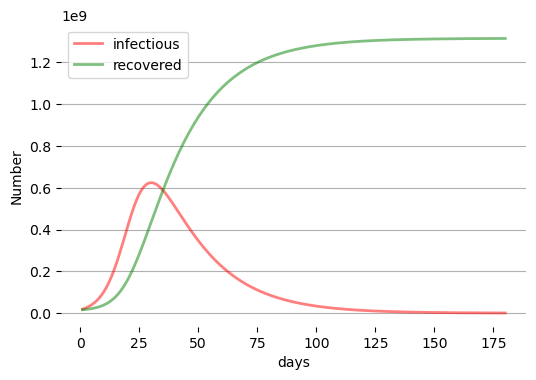

In [17]:
#Drawing
fig, ax = plt.subplots(facecolor='w', dpi=100)

for data, color, label_name in zip([solution[:,1], solution[:,2]], ['r', 'g'], ['infectious', 'recovered']):
    ax.plot(t, data, color, alpha=0.5, lw=2, label=label_name)
    
ax.set_xlabel('days')
ax.set_ylabel('Number')
ax.legend()
ax.grid(axis='y')
plt.box(False)



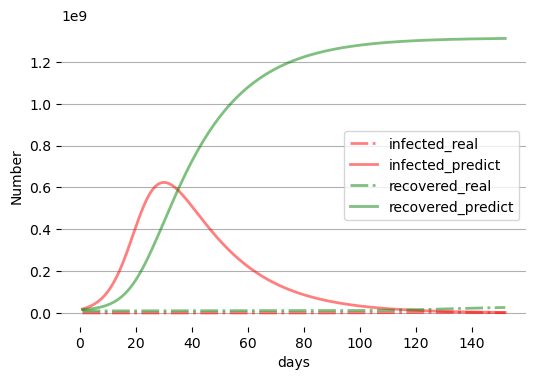

In [18]:
data = pd.read_csv('D:/Leeds/Msc_project/Data/Data_India.csv')
India = data[data['Country'] == 'India']
India_t = India.set_index('Date_reported').loc['2021/5/1':'2021/5/24']

infectious_real = India['total_confirmed'] - India['total_recoverd'] - India['total_deaths']
recovered_real = India['total_recoverd'] + India['total_deaths']
susceptible_real = N - infectious_real - recovered_real

T = len(infectious_real)

t = np.linspace(1,T,T)

solution = odeint(SIR, y0, t, args = (beta, gamma))

#Drawing
fig, ax = plt.subplots(facecolor='w', dpi=100)

# Plotting the estimated I-curve against the true I-curve
ax.plot(t, infectious_real, 'r-.', alpha=0.5, lw=2, label='infected_real')
ax.plot(t, solution[:,1], 'r', alpha=0.5, lw=2, label='infected_predict')
# Plotting the estimated R-curve against the true I-curve
ax.plot(t, recovered_real, 'g-.', alpha=0.5, lw=2, label='recovered_real')
ax.plot(t, solution[:,2], 'g', alpha=0.5, lw=2, label='recovered_predict')

ax.set_xlabel('days')
ax.set_ylabel('Number')
ax.legend()
ax.grid(axis='y')
plt.box(False)

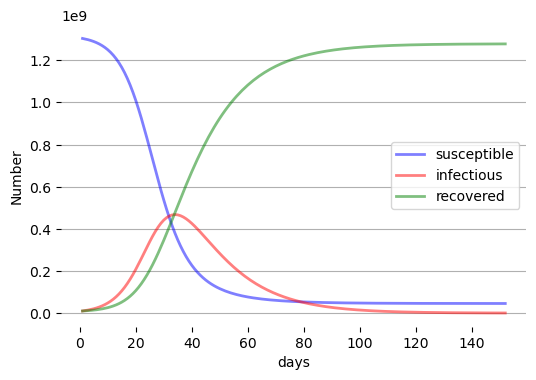

In [19]:
# Total number of people N
N = 13.24e8  #India has a population of 1.38 billion people

# Set the number of infections at the beginning I0
I0 = 10286709

# Set the recovery number R0 at the beginning
R0 = 9883461 + 148994

# Number of people initially susceptible = 
#Total - Number of people initially infected - Number of people initially cured
S0 = N - I0 - R0

# Set initial values
y0 = [S0, I0, R0]

# Setting the estimated time span of the outbreak at 152 days
t = np.linspace(1,152,152)

# Set beta value
beta = 0.25

# Set gamma value
gamma = 1/14

solution = odeint(SIR, y0, t, args = (beta, gamma))

#Drawing
fig, ax = plt.subplots(facecolor='w', dpi=100)

for index, color, label_name in zip(range(3), ['b','r','g'], ['susceptible', 'infectious', 'recovered']):
    ax.plot(t, solution[:, index], color, alpha=0.5, lw=2, label=label_name)

ax.set_xlabel('days')
ax.set_ylabel('Number')
ax.legend()
ax.grid(axis='y')
plt.box(False)


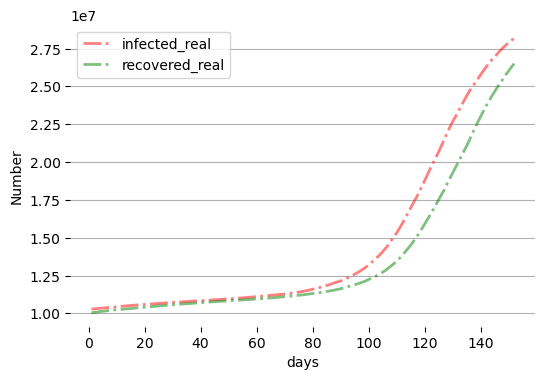

In [20]:
data = pd.read_csv('D:/Leeds/Msc_project/Data/Data_India.csv')
India = data[data['Country'] == 'India']

infectious_real = India['total_confirmed']
recovered_real = India['total_recoverd'] + India['total_deaths']
susceptible_real = N - infectious_real - recovered_real

T = len(infectious_real)

t = np.linspace(1,T,T)

fig, ax = plt.subplots(facecolor='w', dpi=100)

#plt.plot(x_data, y_data, 'bo-', linewidth = 1)
plt.plot(t, infectious_real, 'r-.', alpha=0.5, lw=2, label='infected_real')
plt.plot(t, recovered_real, 'g-.', alpha=0.5, lw=2, label='recovered_real')

ax.set_xlabel('days')
ax.set_ylabel('Number')
ax.legend()
ax.grid(axis='y')
plt.box(False)